  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/86/a3/a6ffba31621a402d12b137e656814c7b8de2f796fa976acbe92f4602ebad/tensorflow-2.13.0-cp311-cp311-macosx_10_15_x86_64.whl.metadata
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/c9/ea/fe2a69cc6cfebf7c7ee8a6357566fc1cbb91632bde5869b669a396accb5f/libclang-16.0.6-py2.py3-none-macosx_10_9_x86_64.whl.metadata
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Obtaining dependency information for p

  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.3/216.3 MB 2.8 MB/s eta 0:00:00:00:0100:01
Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 3.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 11.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.8/181.8 kB 4.4 MB/s eta 0:00:00ta 0:00:01
Using cached tensorboard_data_server-0.7.1-py3-none-macosx_10_9_x86_64.whl (4.8 MB)
Using cached cachetools-5.3.1-py3-none-any.whl (9.3 kB)
  Attempting uninstall: typing-extensio

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [7]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [8]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

Potato___Early_blight


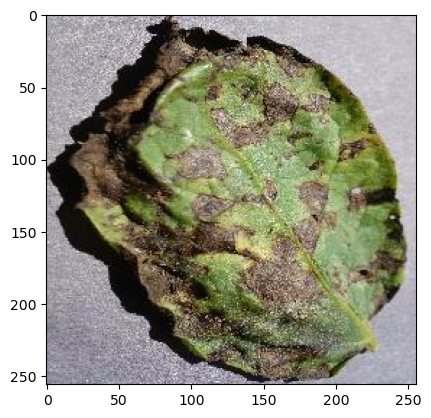

In [22]:
for img, label in dataset.take(1):
    plt.imshow(img[0].numpy().astype("uint8"))
    print(class_names[label[0]])

In [23]:
len(dataset)

68

In [24]:
train_size =0.8
len_train = len(dataset)*train_size
print(len_train)

54.400000000000006


In [26]:
train_ds = dataset.take(54)
len(train_ds)

54

In [27]:
left_ds = dataset.skip(54)
len(left_ds)

14

In [37]:
val_ds = left_ds.take(6)
len(val_ds)

6

In [38]:
test_ds= left_ds.skip(6)
len(test_ds)

8

SPLIT FUNCTION

In [45]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [46]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [47]:
len(train_ds)

54

In [48]:
len(test_ds)

8

In [49]:
len(val_ds)

6

In [50]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

preprocessing

In [53]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256, 256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [54]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [59]:
i_sp = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,3)
cnn = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=i_sp),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu',input_shape=i_sp),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu',input_shape=i_sp),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3),activation='relu',input_shape=i_sp),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(32,(3,3),activation='relu',input_shape=i_sp),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(64,activation='relu'),
    layers.Dense(3,activation='softmax')
    
]
)
cnn.build(input_shape = i_sp)
cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_20 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_20 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [61]:
cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [62]:
history = cnn.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 141s 3s/step - loss: 0.9186 - accuracy: 0.4716 - val_loss: 0.8989 - val_accuracy: 0.3854
Epoch 2/50
54/54 [==============================] - 135s 3s/step - loss: 0.7030 - accuracy: 0.6250 - val_loss: 0.9113 - val_accuracy: 0.6667
Epoch 3/50
54/54 [==============================] - 121s 2s/step - loss: 0.4115 - accuracy: 0.8247 - val_loss: 0.3554 - val_accuracy: 0.8698
Epoch 4/50
54/54 [==============================] - 115s 2s/step - loss: 0.2442 - accuracy: 0.8987 - val_loss: 0.1345 - val_accuracy: 0.9635
Epoch 5/50
54/54 [==============================] - 121s 2s/step - loss: 0.1799 - accuracy: 0.9317 - val_loss: 0.4262 - val_accuracy: 0.8021
Epoch 6/50
54/54 [==============================] - 113s 2s/step - loss: 0.1871 - accuracy: 0.9311 - val_loss: 0.0969 - val_accuracy: 0.9688
Epoch 7/50
54/54 [==============================] - 112s 2s/step - loss: 0.1373 - accuracy: 0.9468 - val_loss: 0.0854 - val_accuracy: 0.9896
Epoch 8/50
54

In [64]:
scores = cnn.evaluate(test_ds)

8/8 [==============================] - 8s 442ms/step - loss: 0.0119 - accuracy: 0.9922


In [72]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

    
loss = history.history['loss']
val_loss = history.history['val_loss']

In [92]:
import numpy as np
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)
    print(predictions[0])
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 54ms/step
[1.0000000e+00 1.3796442e-10 2.2655181e-28]
1/1 [==============================] - 0s 50ms/step
[9.9999952e-01 4.3514385e-07 4.6638034e-25]
1/1 [==============================] - 0s 58ms/step
[1.0000000e+00 1.9272990e-09 7.3598146e-26]
1/1 [==============================] - 0s 55ms/step
[9.99987960e-01 1.20904815e-05 4.31476497e-23]
1/1 [==============================] - 0s 53ms/step
[9.99997973e-01 1.99172428e-06 1.21595145e-17]
1/1 [==============================] - 0s 54ms/step
[9.9840158e-01 1.5984215e-03 1.0084714e-17]
1/1 [==============================] - 0s 56ms/step
[9.9998319e-01 1.6784114e-05 1.8211611e-15]
1/1 [==============================] - 0s 66ms/step
[1.6347106e-07 9.9999988e-01 1.1285305e-11]
1/1 [==============================] - 0s 57ms/step
[9.999739e-01 2.612526e-05 8.473023e-22]


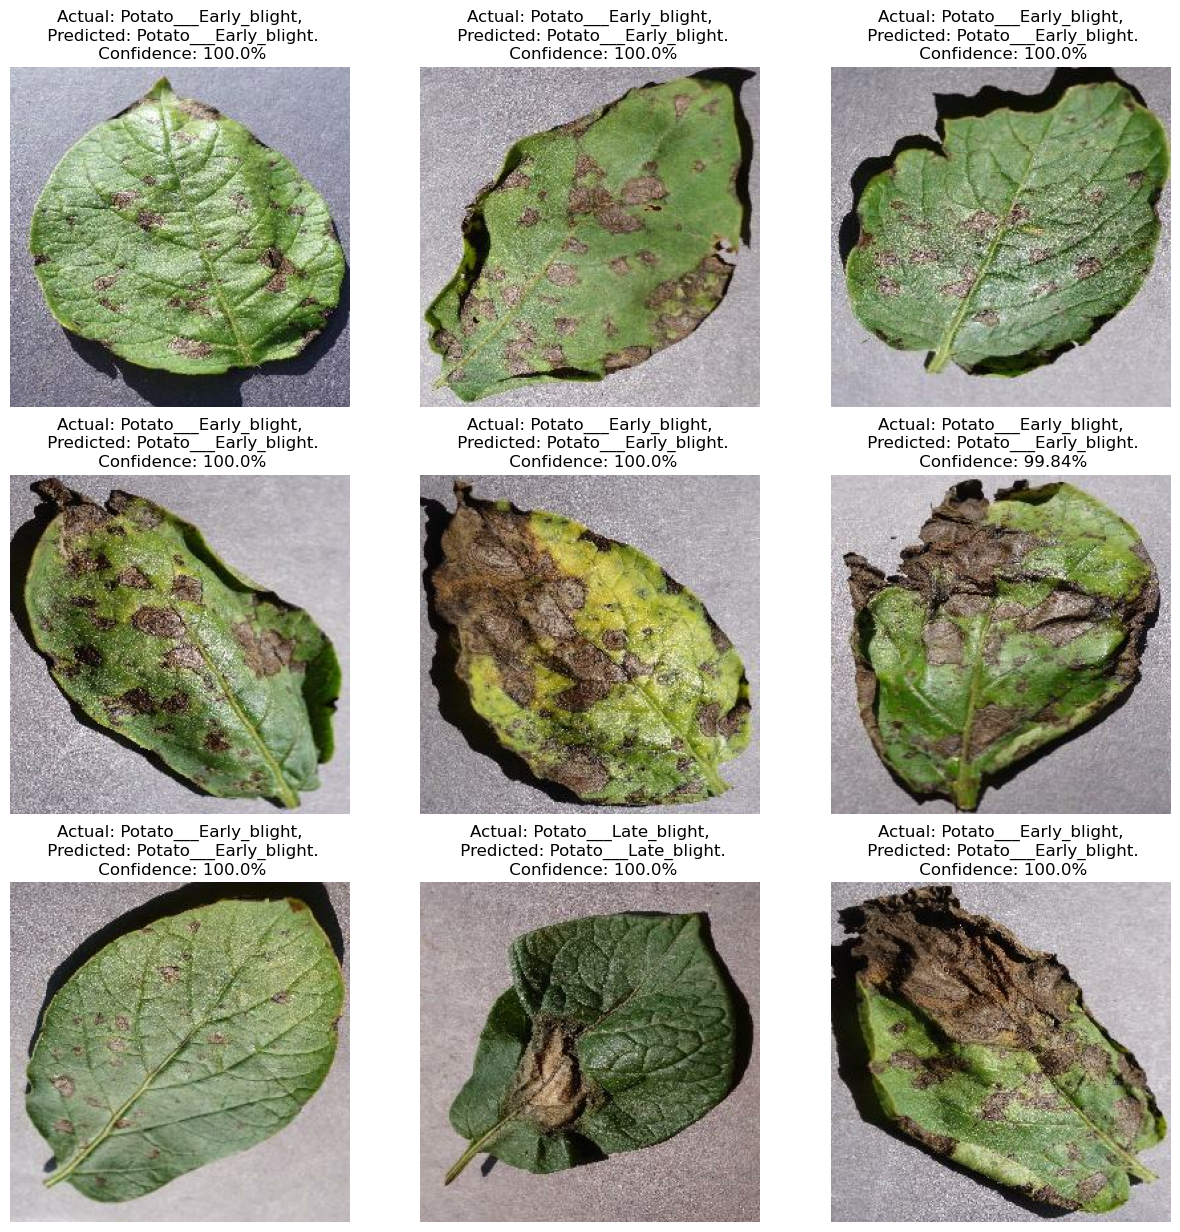

In [93]:
plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(cnn, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [87]:
model_version = 1
cnn.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/1/assets


INFO:tensorflow:Assets written to: models/1/assets


In [94]:
print(tf.__version__)

2.13.0
